In [1]:
from pomegranate import*

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kde

In [3]:
from hmm_helpers import build_hmm

In [4]:
sns.set(color_codes=True)

In [58]:
ffile = "../"
hmm_file = ffile + "HMM_Model_0.json"
path = ffile 

In [64]:
# this is the model we trained
hmm = build_hmm(hmm_file)

# make sure that no updsates occur
hmm.freeze()

Orphan state HMM_Model-start removed due to no edges                             leading to it
Orphan state HMM_Model-end removed due to no edges                             leading to it


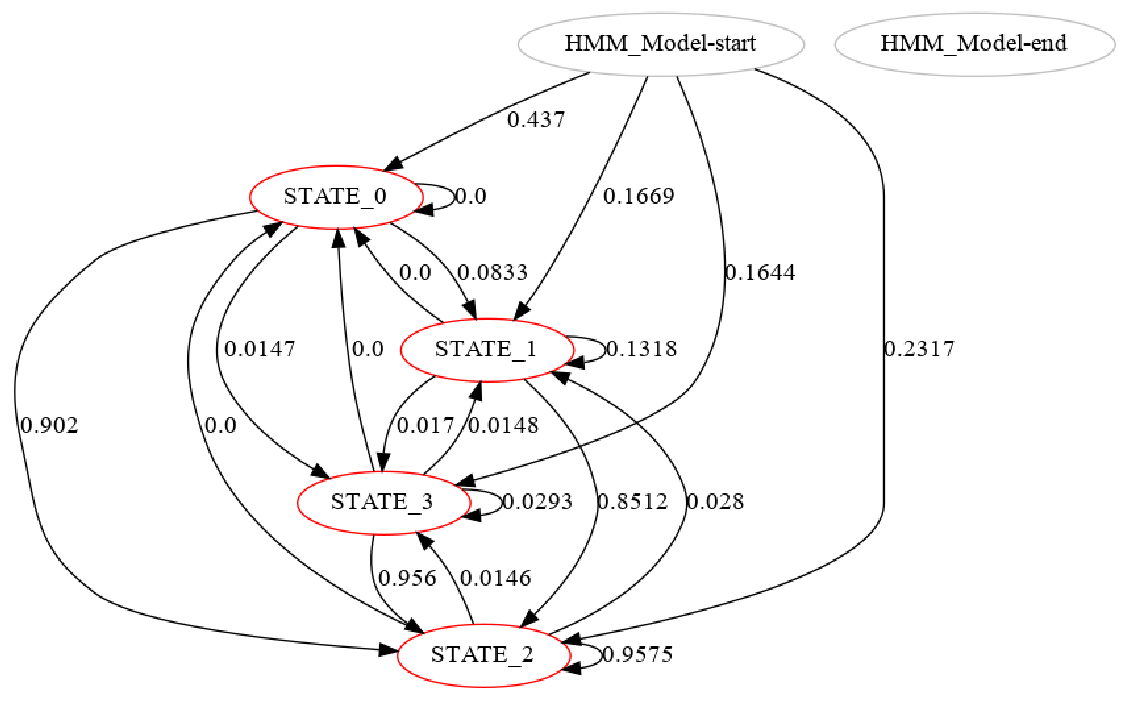

In [65]:
# visualize the model we just trained
plt.figure( figsize=(20,18) )
hmm.plot()
plt.show()

In [31]:
# load the non wga means
#no_wga_wmeans =[]

#with open(path + "/no_wga_windows_mean.txt") as file:
#    context = file.read()
#    size = len(context)
#    arraystr= context[1:size-1]
#    arraystr = arraystr.split(',')
#    no_wga_wmeans = [float(item) for item in arraystr]

In [32]:
# load the wga means
#wga_wmeans =[]
#with open(path + "/wga_windows_mean.txt") as file:
#    context = file.read()
#    size = len(context)
#    arraystr= context[1:size-1]
#    arraystr = arraystr.split(',')
#    wga_wmeans = [float(item) for item in arraystr]

In [39]:
# visualize two 
nbins = 80
min_ = 0.0
max_ = 50.0

plt.figure( figsize=(10,10) )
#plt.hist2d(no_wga_wmeans, wga_wmeans,
#                 bins=[nbins, nbins], cmap='Blues', density=False,
#                 cmax=1000,
#                 cmin=0,
#                 alpha=0.99,
#                 range=((min_, max_), (min_, max_)))
#plt.title = "Hist 2D"
#plt.show()

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

In [38]:
# Evaluate a gaussian kde on a
# regular grid of nbins x nbins over data extents
kernel= kde.gaussian_kde(np.vstack([no_wga_wmeans, wga_wmeans]))
xi, yi = np.mgrid[min_:max_:nbins*1j,
                    min_:max_:nbins*1j]
zi = kernel(np.vstack([xi.flatten(), yi.flatten()]))
plt.title='Gaussian KDE'
#plt.pcolormesh(xi, yi, zi.reshape(xi.shape), cmap='Blues') #plt.cm.BuGn_r)
#plt.contour(xi, yi, zi.reshape(xi.shape) )
#plt.show()

In [40]:
# load a sequence other than that we trained the HMM
from train import make_windows

In [43]:
configuration={
    
    "reference_file":{
    "filename": "/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna",
    "start_idx" :140001,
    "end_idx": 1800001
  },
  "no_wga_file": {
     "filename": "/scratch/spectre/a/ag568/m585_verysensitive_trim_sorted.bam",
     "start_idx": 140001,
     "end_idx": 1800001
  },
  "test_file":{
    "filename": "/scratch/spectre/a/ag568/m605_verysensitive_trim_sorted.bam",
    "start_idx": 140001,
    "end_idx": 1800001
  },
  "window_size":100,
  "fill_missing_window_data":False,
  "fill_missing_window_data_factor":0,
  "quality_threshold":None,
  "chromosome": "chr1",
  "save_windows":False,
  "remove_windows_with_N":True,
  "windows_filename":"hmm_windows.json",
  "outlier_remove":{

    "name":"zscore",
    "config":{
      "sigma_factor":2
    }
  },   
}

In [66]:
mixed_windows = make_windows(configuration=configuration)

INFO: Start index: 140001
INFO: End index:   1800001
INFO: Window size: 100
INFO: Chromosome:  chr1
INFO: Creating WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m605_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 1414318
INFO: Extracting common bases


INFO: Estimated number of windows: 14143 
INFO: Number of WGA windows: 16611
INFO: Creating No WGA Windows...
INFO: Reference file: b'/scratch/spectre/a/ag568/GCA_000001405.15_GRCh38_no_alt_analysis_set.fna'
INFO: Alternative file: b'/scratch/spectre/a/ag568/m585_verysensitive_trim_sorted.bam' 
INFO: Not using quality threshold


INFO: Number of errors: 0
INFO: Number of adjusted: 0
INFO: Bam length: 1502625
INFO: Extracting common bases


INFO: Estimated number of windows: 15026 
INFO: Number of non-wga windows: 16602
INFO: Filtering windows for Ns...
INFO: Number of wga windows after filtering: 15108
INFO: Number of non-wga windows after filtering: 15099
INFO: Done...
INFO: Number of mixed windows: 15099
INFO: WGA stats: {'mean': 10.35467249486721, 'var': 78.73724470862223, 'median': 8.0, 'min': 0, 'max': 124, 'mode': 0, 'iqr': 11.0, 'q75': 15.0, 'q25': 4.0, 'q50': 8.0}
INFO: No WGA stats: {'mean': 15.47241680999969, 'var': 117.24726087388962, 'median': 15.0, 'min': 0, 'max': 513, 'mode': 14, 'iqr': 8.0, 'q75': 19.0, 'q25': 11.0, 'q50': 15.0}
INFO: Number of windows after outlier removal: 14501


In [61]:
# create the sequences
sequence = []

for window in mixed_windows:
    sequence.append(window.get_rd_stats(statistics="mean", name="both")) 

In [47]:
# Viterbi path
# create a sequence of window means
#sequence=[]
#for mu1, mu2 in zip(wga_wmeans, no_wga_wmeans):
#    sequence.append((mu1,mu2))

Run the Viterbi algorithm on the sequence given the model. This finds the ML path of hidden states given the sequence. Returns a tuple of the log probability of the ML path, or (-inf, None) if the sequence is impossible under the model. 
If a path is returned, it is a list of tuples of the form (sequence index, state object).

In [62]:
viterbi_path=hmm.viterbi(sequence)

In [63]:
print("Log-probability of ML Viterbi path: ", viterbi_path[0])

Log-probability of ML Viterbi path:  -99583.36236120429


In [54]:
# This is not a very useful print unless we 
# don't do any preprocessing
#print(viterbi_path[1][0:100])

In [56]:
p_d_given_m = hmm.log_probability(sequence=sequence)
print("P(D|M): ", p_d_given_m)
print(hmm.predict_proba(sequence))

P(D|M):  -100581.74348372259
[[9.98089696e-001 5.44287009e-012 1.91030805e-003 8.33097483e-301
  0.00000000e+000]
 [9.65746857e-001 3.42489162e-002 4.23020836e-006 1.81319201e-301
  1.52047089e-010]
 [9.99587209e-001 7.84184496e-008 4.12714082e-004 1.53928155e-301
  1.90221303e-009]
 ...
 [4.29080250e-002 1.67072778e-008 9.57091958e-001 9.22964801e-301
  3.03849867e-013]
 [1.31687591e-003 1.74391873e-017 9.98683124e-001 3.36511957e-301
  7.32505526e-072]
 [9.87936681e-004 1.42432378e-021 9.99012063e-001 2.32050592e-300
  7.23960391e-091]]


In [52]:
predictions = hmm.predict(sequence=sequence, algorithm="viterbi")

In [53]:
print(predictions)

[5, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 